# Brownian motion

En éste proyecto se estará generando una simulación de movimiento browniano

## Carga de librerías

El primer paso es la carga de las librerías requeridas 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import wrapcauchy

import plotly.graph_objects as go

In [ ]:
################# http://www.pygame.org/wiki/2DVectorClass ##################
class Vec2d(object):
    """2d vector class, supports vector and scalar operators,
       and also provides a bunch of high level functions
       """
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y = None):
        if y == None:            
            self.x = x_or_pair[0]
            self.y = x_or_pair[1]
        else:
            self.x = x_or_pair
            self.y = y
            
    # Addition
    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)

    # Subtraction
    def __sub__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)
        elif (hasattr(other, "__getitem__")):
            return Vec2d(self.x - other[0], self.y - other[1])
        else:
            return Vec2d(self.x - other, self.y - other)
    
    # Vector length
    def get_length(self):
        return math.sqrt(self.x**2 + self.y**2)
    
    # rotate vector
    def rotated(self, angle):        
        cos = math.cos(angle)
        sin = math.sin(angle)
        x = self.x*cos - self.y*sin
        y = self.x*sin + self.y*cos
        return Vec2d(x, y)


## Brownian motion 1D walk

Se realiza la generación del movimiento browniando, configurando los parámetros requeridos, muestreo, etc.

In [ ]:
def brownian(start_pos, n_steps, dt, speed, out=None):
    """
    Genera una instancia de movimiento browniano, (Proceso de Wiener):

        X(t) = X(0) + N(0, delta**2 * t; 0, t)

    Donde N(a,b; t0, t1) es una variable de distribución normal, con media 'a'
    y varianza 'b'.  Los parámetros t0 y t1 describen la independencia
    estadística de N sobre diferentes intervalos de tiempo;

    Argumentos
    ---------
    start_pos : arreglo de numpy o flotante
        la posición inicial del movimiento.
    n_steps : entero
        Número de pasos que tomará el movimiento
    dt : flotante
        El paso de tiempo.
    speed : flotante
        Determina la "velocidad" del movimiento. La posición en el tiempo t,
        X(t), tiene una distribución normal cuya media es la posición en el
        tiempo t=0 y cuya varianza es speed**2*t.
    out : arreglo numpy
        Si out no es None, especifica el arreglo donde se guarda el resultado,
        de lo contrario crea uno y lo retorna

    Returns
    -------
    Un arreglo numpy de flotantes con forma `x0.shape + (n,)`.
    
    NOTA: x0 no se incluye en el arreglo final
    """

    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    r = norm.rvs(size=x0.shape + (n_steps,), scale=speed*sqrt(dt))

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    # Calcula el movimiento Browniano formando la suma cumulativa de las muestras
    np.cumsum(r, axis=-1, out=out)

    # Agrega la condición inicial
    out += np.expand_dims(x0, axis=-1)

    return out

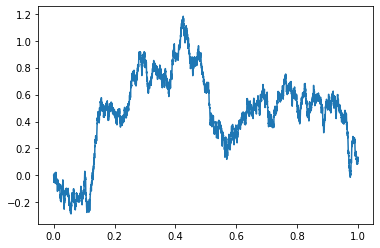

In [2]:
# Definición de parámetros iniciales
#  - n_steps = número de pasos
#  - T = valor de tiempo final
#  - times = vector de tiempo
#  - dt = valor de distancia entre cada paso
#  - B(t2) - B(t1) ~ Normal con media 0 y varianza t2-t1

n_steps = 10000
T = 1. 
times = np.linspace(0., T, n_steps)

dt = times[1] - times[0]

# Multiplicamos la raíz de la distancia de cada paso en times 
# al vector aleatorio de distribución normal que creamos,
# generando un arreglo de diferencias de valores de mov. Browniano 
dB = np.sqrt(dt) * np.random.normal(size=(n_steps - 1, ))

# Para obtener los valores del mov. Browniano, empezamos con el valor inicial
# y vamos sumando las diferencias progresivamente
B0 = np.zeros(shape=(1, ))

# Realizamos la concatenación para obtener el vector de Mov. Browniano
BM = np.concatenate((B0, np.cumsum(dB)))

plt.plot(times, BM)
plt.show()

In [ ]:
# Init parameters
s_pos = 0
n_steps = 10000

# Init BW
bw = np.ones(n_steps)*n_steps


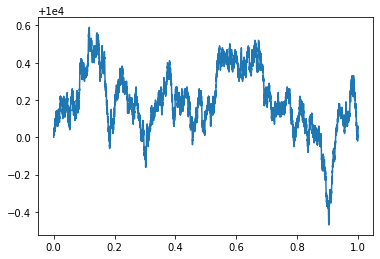

In [ ]:
for i in range(1, n_steps):
  # sample from a normal distribution
  di = np.random.choice([1,-1])
  # wiener process
  bw[i] = bw[i-1] + (di/np.sqrt(n_steps))

# Vector aux
times = np.linspace(0,1,n_steps)

# Plot
plt.plot(times,bw)
plt.show()

## Implementación Alternativa

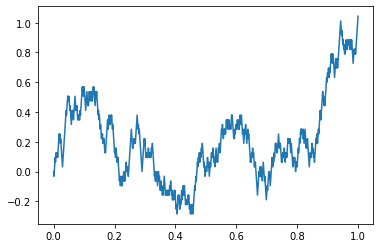

In [ ]:
# Init parameters 
n_steps = 1000

# Este warning para el escalamiento Wiener
if n_steps < 30:
  print('Warning! The number of steps is too small!')

# Vector
dB = np.random.choice([1,-1],size=(n_steps - 1,))*1/np.sqrt(n_steps)

# Init Brownian Walker
bw = np.zeros(shape=(1,))

# Generar trayectoria
bw = np.concatenate((bw, np.cumsum(dB)))

# Times aux
times = np.linspace(0,1,n_steps)

plt.plot(times,bw)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

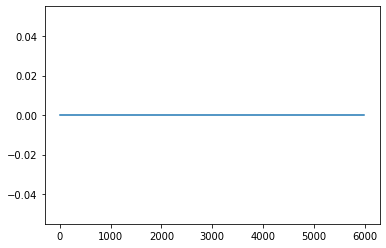

In [ ]:
#init variables
n_steps = 1000
s_pos = 0
speed = 6

#init velocity vector
velocity = Vec2d(speed, 0)

# Matrix for brownian walker
BM_2d = np.ones(shape=(n_steps, 2)) * s_pos

#Turn angles in 2d plane
for i in range(1, n_steps):
  turn_angle = np.random.choice([0, np.pi/2, np.pi, 3*np.pi/2])
  velocity.rotated(turn_angle)

  BM_2d[i,0] = BM_2d[i-1,0] + velocity.x
  BM_2d[i,1] = BM_2d[i-1,1] + velocity.y

plt.plot(BM_2d[:,0], BM_2d[:,1])
plt.show

In [ ]:

#resolution
resolution = 200
aux_domain = np.linspace(0, 2*np.pi, resolution)

def wrapcauchy_pdf_exp(CWR_exp):
  return np.array([wrapcauchy.pdf(i, CWR_exp) for i in aux_domain])

CRW_exps = [0.00001, 0.3, 0.4, 0.6, 0.9]


In [ ]:
fig_wrapcauchy_pdf = go.Figure()
#Create aux plot
aux_plot = np.linspace(-np.pi,np.pi, resolution)

wrapcauchy_pdf_01 = wrapcauchy_pdf_exp(CRW_exps[0])
plot_wc_pdf_01 = np.concatenate((wrapcauchy_pdf_01[int(resolution/2):resolution], wrapcauchy_pdf_01[0:int(resolution/2)]), axis=0)

fig_wrapcauchy_pdf.add_trace(go.Scatter( 
  x = aux_plot,
  y = plot_wc_pdf_01,
  marker = dict(size=2),
  line = dict(width=2),
  mode = 'lines',
  name = f'cauchy_{CRW_exps[0]}',
  showlegend = True
))

wrapcauchy_pdf_02 = wrapcauchy_pdf_exp(CRW_exps[1])
plot_wc_pdf_02 = np.concatenate((wrapcauchy_pdf_02[int(resolution/2):resolution], wrapcauchy_pdf_02[0:int(resolution/2)]), axis=0)

fig_wrapcauchy_pdf.add_trace(go.Scatter( 
  x = aux_plot,
  y = plot_wc_pdf_02,
  marker = dict(size=2),
  line = dict(width=2),
  mode = 'lines',
  name = f'cauchy_{CRW_exps[1]}',
  showlegend = True
))

wrapcauchy_pdf_03 = wrapcauchy_pdf_exp(CRW_exps[2])
plot_wc_pdf_03 = np.concatenate((wrapcauchy_pdf_03[int(resolution/2):resolution], wrapcauchy_pdf_03[0:int(resolution/2)]), axis=0)

fig_wrapcauchy_pdf.add_trace(go.Scatter( 
  x = aux_plot,
  y = plot_wc_pdf_03,
  marker = dict(size=2),
  line = dict(width=2),
  mode = 'lines',
  name = f'cauchy_{CRW_exps[2]}',
  showlegend = True
))

wrapcauchy_pdf_04 = wrapcauchy_pdf_exp(CRW_exps[3])
plot_wc_pdf_04 = np.concatenate((wrapcauchy_pdf_04[int(resolution/2):resolution], wrapcauchy_pdf_04[0:int(resolution/2)]), axis=0)

fig_wrapcauchy_pdf.add_trace(go.Scatter( 
  x = aux_plot,
  y = plot_wc_pdf_04,
  marker = dict(size=2),
  line = dict(width=2),
  mode = 'lines',
  name = f'cauchy_{CRW_exps[3]}',
  showlegend = True
))

wrapcauchy_pdf_05 = wrapcauchy_pdf_exp(CRW_exps[4])
plot_wc_pdf_05 = np.concatenate((wrapcauchy_pdf_05[int(resolution/2):resolution], wrapcauchy_pdf_05[0:int(resolution/2)]), axis=0)

fig_wrapcauchy_pdf.add_trace(go.Scatter( 
  x = aux_plot,
  y = plot_wc_pdf_05,
  marker = dict(size=2),
  line = dict(width=2),
  mode = 'lines',
  name = f'cauchy_{CRW_exps[4]}',
  showlegend = True
))


# Brownian motion 2d using plotly

In [ ]:
fig_BM_2d = go.Figure()

fig_BM_2d.add_trace(go.Scatter( 
    x = BM_2d[:,0],
    y = BM_2d[:,1],
    marker = dict(size=2),
    line = dict(width=2),
    mode = 'lines',
    name = 'BM_2d',
    showlegend = True
))